In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NG_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,0.778,0.000,0.000,NaN,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,NaN,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,NaN,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,NaN,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,NaN,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,NaN
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	348
float64		column 2	203
float64		column 3	261
float64		column 4	265
float64		column 5	174
float64		column 6	120
float64		column 7	290
float64		column 8	116
float64		column 9	236
float64		column 10	319
float64		column 11	203
float64		column 12	290
float64		column 13	203
float64		column 14	174
float64		column 15	265
float64		column 16	116
float64		column 17	319
float64		column 18	116
float64		column 19	116
float64		column 20	290
float64		column 21	290
float64		column 22	348
float64		column 23	145
float64		column 24	203
float64		column 25	145
float64		column 26	265
float64		column 27	261
float64		column 28	232
float64		column 29	290
float64		column 30	261
float64		column 31	265
float64		column 32	174
float64		column 33	236
float64		column 34	232
float64		column 35	174
float64		column 36	261
float64		column 37	174
float64		column 38	319
float64		column 39	174
float64		column 40	207
float64		column 41	406
float64		column 42	178
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4249.000000,4394.000000,4336.000000,4332.000000,4423.000000,4477.000000,4307.000000,4481.000000,4361.000000,4278.000000,...,4452.000000,4423.000000,4332.000000,4394.000000,4332.000000,4365.000000,4332.000000,4365.000000,4452.000000,4365.000000
mean,0.102026,0.208216,0.275671,0.069301,0.313052,0.095200,0.109635,0.100995,0.083983,0.229119,...,0.029755,0.036334,0.137830,0.016278,0.267476,0.074601,0.043435,5.219619,51.914196,279.946163
std,0.303793,1.265839,0.496543,1.437684,0.675331,0.274285,0.387395,0.364118,0.266055,0.639860,...,0.280825,0.231928,0.260431,0.110266,0.824975,0.248722,0.437618,32.481770,196.584966,606.239475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.592000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068000,0.000000,0.000000,0.000000,0.000000,2.280000,15.000000,96.000000
75%,0.000000,0.000000,0.410000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.130000,...,0.000000,0.000000,0.188000,0.000000,0.311000,0.048000,0.000000,3.714000,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,6.060000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

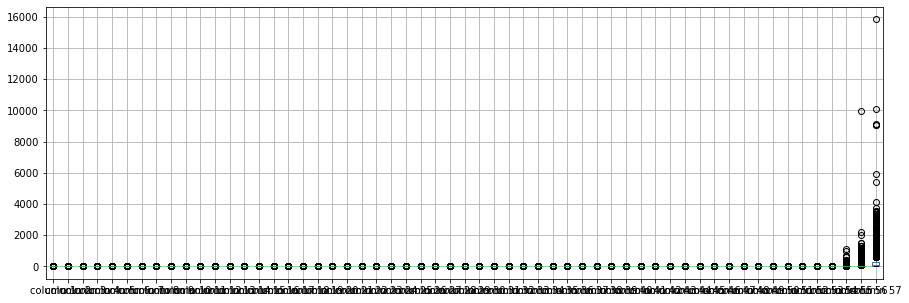

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.102026
column 2       0.208216
column 3       0.275671
column 4       0.069301
column 5       0.313052
column 6       0.095200
column 7       0.109635
column 8       0.100995
column 9       0.083983
column 10      0.229119
column 11      0.057451
column 12      0.538760
column 13      0.091543
column 14      0.055596
column 15      0.046464
column 16      0.247831
column 17      0.134586
column 18      0.180179
column 19      1.642073
column 20      0.076552
column 21      0.798667
column 22      0.105785
column 23      0.099142
column 24      0.090988
column 25      0.542502
column 26      0.252484
column 27      0.753489
column 28      0.121613
column 29      0.090998
column 30      0.094822
column 31      0.064298
column 32      0.045318
column 33      0.087069
column 34      0.044733
column 35      0.101705
column 36      0.094041
column 37      0.132053
column 38      0.013072
column 39      0.074169
column 40      0.060157
column 41      0.034185
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.013720,0.058016,0.014740,0.030065,0.063365,-0.000734,-0.003351,0.119104,0.046315,...,-0.015556,-0.027478,-0.017818,-0.028702,0.057237,0.115808,-0.007507,0.049507,0.057325,0.085531
column 2,-0.013720,1.000000,-0.034238,-0.007142,-0.024185,-0.024384,0.004454,-0.016220,-0.007193,0.029958,...,-0.014728,-0.007460,-0.050448,-0.016747,-0.013976,-0.007732,0.001901,0.002623,-0.001324,-0.021666
column 3,0.058016,-0.034238,1.000000,-0.021225,0.082312,0.087904,0.041660,0.021964,0.085624,0.025143,...,-0.020585,-0.026535,-0.011813,-0.027735,0.102634,0.083060,-0.003812,0.103237,0.103499,0.066461
column 4,0.014740,-0.007142,-0.021225,1.000000,0.005059,-0.010515,0.022117,0.012059,-0.012225,-0.006494,...,-0.001207,-0.000194,-0.010526,-0.007082,-0.004398,0.010062,-0.001377,0.007031,0.023208,0.022863
column 5,0.030065,-0.024185,0.082312,0.005059,1.000000,0.050731,0.123334,0.023928,0.020401,0.039751,...,-0.030939,-0.031943,-0.042758,-0.024724,0.025829,0.038833,0.002119,0.050418,0.049672,0.001404
column 6,0.063365,-0.024384,0.087904,-0.010515,0.050731,1.000000,0.061021,0.082078,0.114971,0.008862,...,-0.028865,-0.024196,-0.021661,-0.011988,0.063559,0.086261,0.019607,-0.009942,0.092173,0.083823
column 7,-0.000734,0.004454,0.041660,0.022117,0.123334,0.061021,1.000000,0.057400,0.056893,0.059308,...,-0.028582,-0.032161,-0.047701,-0.025640,0.043772,0.071189,0.043390,0.036973,0.054865,-0.005541
column 8,-0.003351,-0.016220,0.021964,0.012059,0.023928,0.082078,0.057400,1.000000,0.087669,0.083804,...,-0.022034,-0.029322,-0.030382,-0.019597,0.030589,0.061176,-0.006536,0.008258,0.039742,0.044274
column 9,0.119104,-0.007193,0.085624,-0.012225,0.020401,0.114971,0.056893,0.087669,1.000000,0.129054,...,-0.023215,-0.012116,-0.031388,0.019667,0.039284,0.149206,-0.003058,0.111179,0.175559,0.236450
column 10,0.046315,0.029958,0.025143,-0.006494,0.039751,0.008862,0.059308,0.083804,0.129054,1.000000,...,-0.012302,0.005941,0.007820,0.005789,0.036522,0.074934,0.036368,0.064453,0.091879,0.078702


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+26,17+26+26,17+26+26+26,17+26+26,17+26,17], vae_layer = False, seed = 260)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 645.281803436811
Epoch: 1 , loss: 641.4423514974242
Epoch: 2 , loss: 642.0699119434955
Epoch: 3 , loss: 636.4567934893565
Epoch: 4 , loss: 639.546149011273
Epoch: 5 , loss: 645.3375798135685
Epoch: 6 , loss: 642.4890449603676
Epoch: 7 , loss: 636.4095342815546
Epoch: 8 , loss: 644.0635827360253
Epoch: 9 , loss: 626.779494016428
Epoch: 10 , loss: 645.4975182403671
Epoch: 11 , loss: 632.4689284533989
Epoch: 12 , loss: 625.5688429510136
Epoch: 13 , loss: 536.5330870359202
Epoch: 14 , loss: 484.8509311476651
Epoch: 15 , loss: 479.3727175882054
Epoch: 16 , loss: 462.6430086940008
Epoch: 17 , loss: 459.0266695454561
Epoch: 18 , loss: 444.7797129295429
Epoch: 19 , loss: 448.83701967777694
Epoch: 20 , loss: 453.5749183415536
Epoch: 21 , loss: 442.366412438582
Epoch: 22 , loss: 463.519175778698
Epoch: 23 , loss: 463.3960074448004
Epoch: 24 , loss: 450.03253761318086
Epoch: 25 , loss: 450.7940763945364
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.721992
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.046576,0.0,0.0,0.0,-1.380563,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012683,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,16.590305,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,17.645775,0.000000
4593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.09956,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4594,0.041842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-3.304993
4595,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

9844.643352673587

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.2074362120869436

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.188951
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.239839
column 41      0.083069
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.00000,0.046576,0.778,0.000,0.000,2.375437,61.000000,278.000000
1,0.210000,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000000,0.0,0.13200,0.000000,0.372,0.180,0.048,5.114000,101.000000,1028.000000
2,0.000000,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000000,0.0,0.13500,0.000000,0.135,0.000,0.000,3.537000,40.000000,191.000000
3,0.000000,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.012683,0.0,0.22300,0.000000,0.000,0.000,0.000,3.000000,15.000000,54.000000
4,0.000000,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000000,0.0,0.05400,0.000000,0.164,0.054,0.000,1.671000,20.590305,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.34800,0.000000,1.160,0.000,0.000,3.121000,32.645775,103.000000
4593,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.09956,0.000000,0.000,0.000,0.000,3.043000,15.000000,70.000000
4594,0.041842,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.13600,0.000000,0.000,0.000,0.409,1.837000,12.000000,64.695007
4595,0.170000,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.03200,0.000000,0.065,0.000,0.000,1.189000,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_NG_5(imp).xlsx", index=False, header=False)